In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [22]:
df=pd.read_csv('Mall_Customers_dataset.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.rename(columns={'Genre':'Gender','Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.drop(['CustomerID'],axis='columns', inplace=True)

In [67]:
df

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [27]:
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [30]:
df.shape

(200, 4)

C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='Spending_Score', ylabel='Density'>

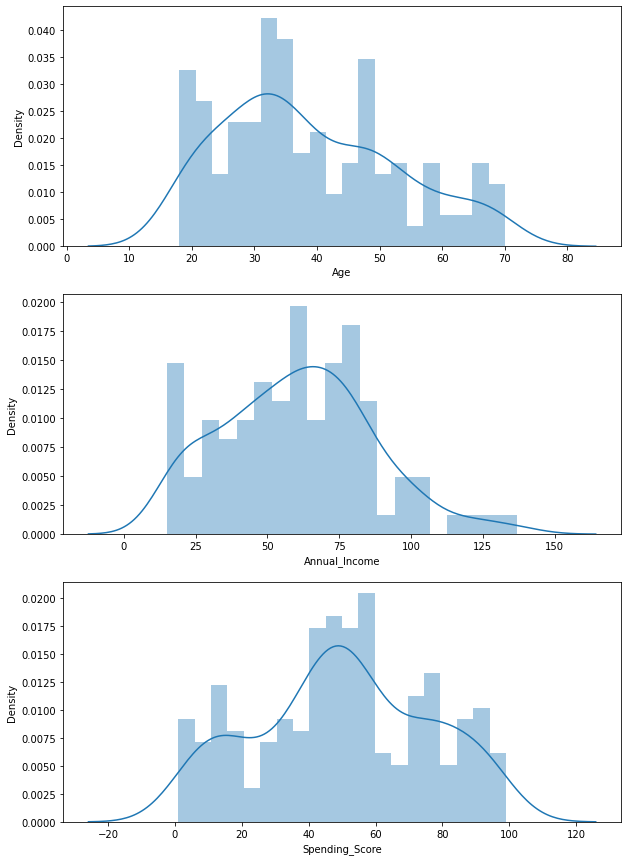

In [42]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.distplot(df.Age,bins=20)
plt.subplot(3,1,2)
sns.distplot(df.Annual_Income,bins=20)
plt.subplot(3,1,3)
sns.distplot(df.Spending_Score,bins=20)

<AxesSubplot:xlabel='count', ylabel='Gender'>

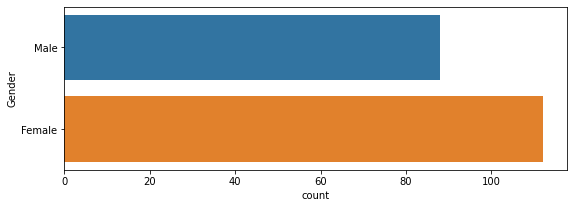

In [50]:
plt.figure(figsize=(9,3))
sns.countplot(y=df.Gender)

Text(0, 0.5, 'Count')

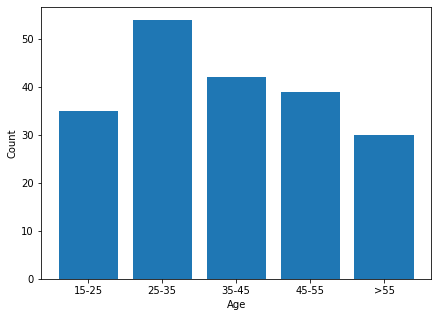

In [83]:
plt.figure(figsize=(7,5))
age15_25=df.Age[(15<=df.Age) & (df.Age<25)]
age25_35=df.Age[(25<=df.Age) & (df.Age<35)]
age35_45=df.Age[(35<=df.Age) & (df.Age<45)]
age45_55=df.Age[(45<=df.Age) & (df.Age<55)]
age_more55=df.Age[df.Age>=55]

x=['15-25','25-35','35-45','45-55','>55']
y=[age15_25.count(),age25_35.count(),age35_45.count(),age45_55.count(),age_more55.count()]
plt.bar(x,y)
plt.xlabel('Age')
plt.ylabel('Count')

In [100]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='Annual_Income'>

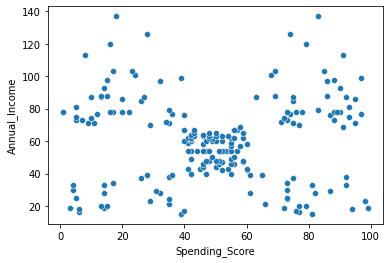

In [91]:
sns.scatterplot(df.Spending_Score,df.Annual_Income)

C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='Age'>

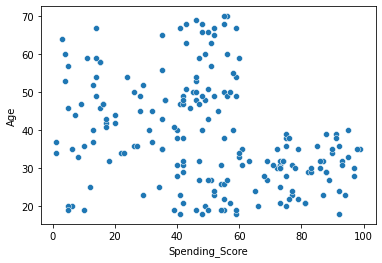

In [92]:
sns.scatterplot(df.Spending_Score,df.Age)

C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:13

Text(0, 0.5, 'WCSS')

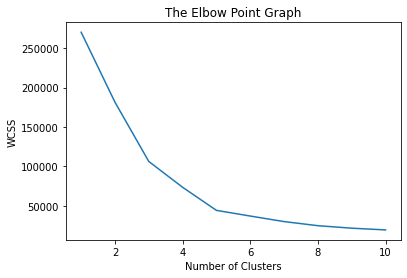

In [108]:
X1 = df.loc[:,["Annual_Income","Spending_Score"]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Optimum Number of Clusters = 5

In [133]:
kmeans=KMeans(n_clusters=5, init='k-means++')
y=kmeans.fit_predict(X1)
y

C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [134]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

Text(0, 0.5, 'Spending score')

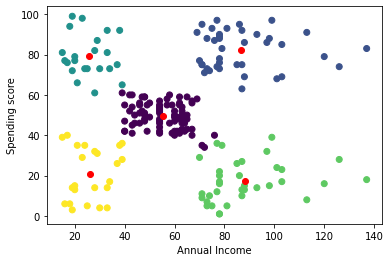

In [135]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')

C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:13

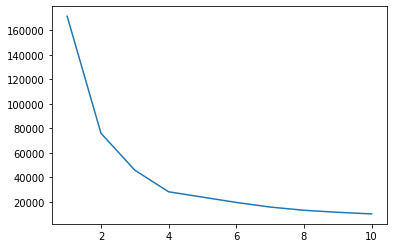

In [136]:
X2=df.loc[:,['Age','Spending_Score']].values
wcss2=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)

plt.plot(range(1,11),wcss2)

Optimum Number of Clusters = 4

In [140]:
kmeans2=KMeans(n_clusters=4, init='k-means++')
y2=kmeans2.fit_predict(X2)
y2

C:\Users\akpat\anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 3,
       1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 2,
       1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 3, 2, 3, 0, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [141]:
kmeans2.cluster_centers_

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617],
       [30.1754386 , 82.35087719]])

Text(0, 0.5, 'Spending score')

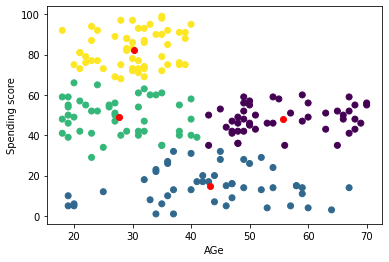

In [143]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1], color='red')
plt.xlabel('AGe')
plt.ylabel('Spending score')